In [1]:
ls ./data/cannon_models/*.csv

./data/cannon_models/rchip_order_stats.csv


In [2]:
import pandas as pd
#df_old = pd.read_csv('./data/cannon_models/rchip_order_stats_pre_mask.csv')
df_new = pd.read_csv('./data/cannon_models/rchip_order_stats.csv')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


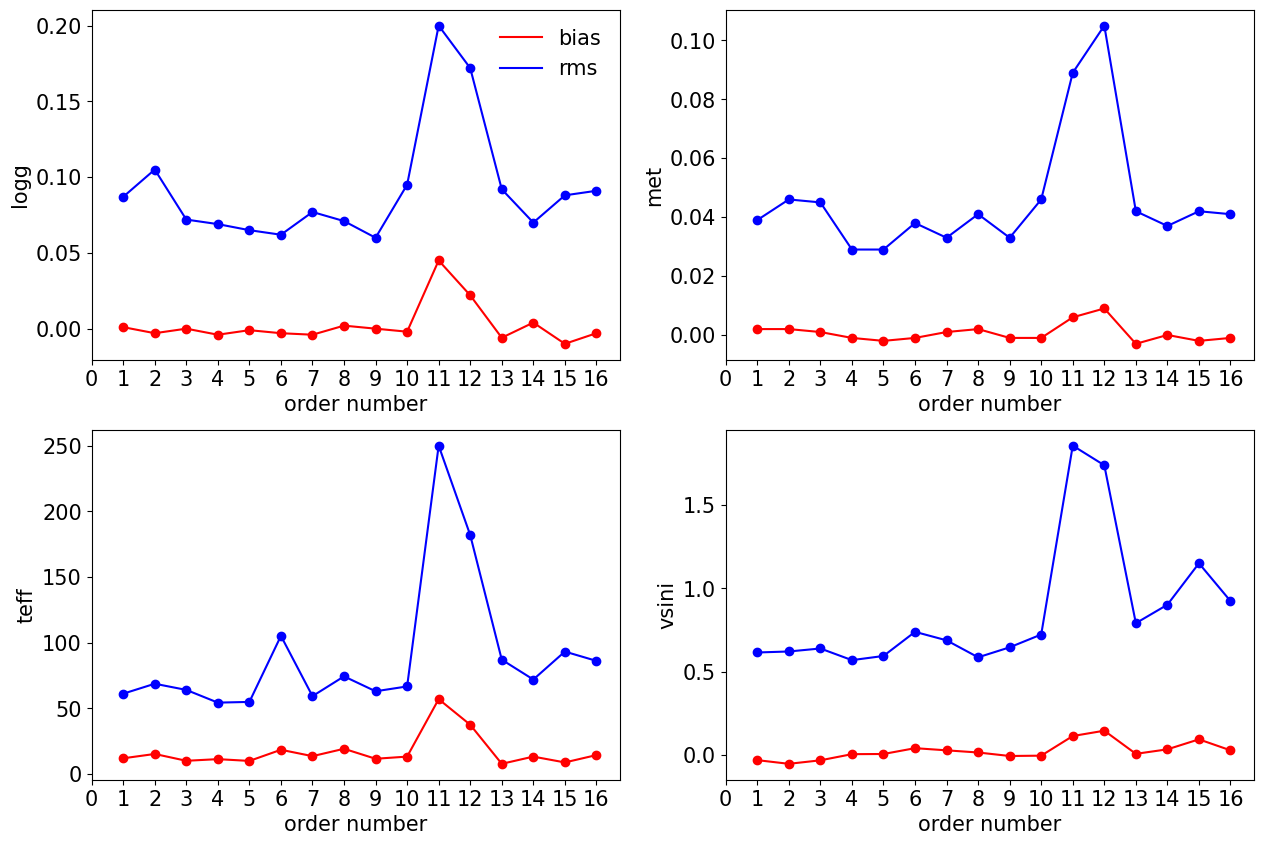

In [3]:
# can I plot teff for 1 order?
# it's just a single value

%pylab inline
figure(figsize=(15,10))
rcParams['font.size']=15
label_strings = np.unique(df_new.label.to_numpy())
for i in range(len(label_strings)):
    subplot(2,2,i+1)
    label_str = label_strings[i]
    df_label = df_new.query('label == @label_str')
    plot(df_label.order, df_label.bias, 'ro')
    plot(df_label.order, df_label.bias, 'r-', label='bias')

    plot(df_label.order, df_label.rms, 'bo')
    plot(df_label.order, df_label.rms, 'b-', label='rms')
    xticks(ticks=np.arange(0,17,1))
    ylabel(label_str[1:])
    xlabel('order number')
    
    if i==0:
        legend(frameon=False)

In [ ]:
# order 15 is working better.
# but order 11, 12 aren't
# let me see what order 15 looks like
# then compare to order 11, 12
# it seems like the mask still works
# 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<ErrorbarContainer object of 3 artists>

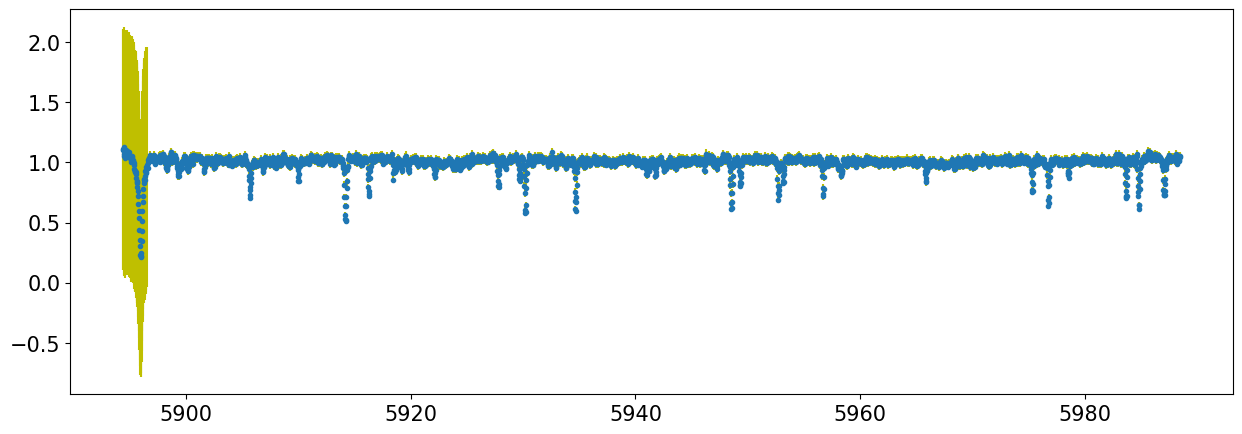

In [28]:
# does order 12 look right?
# I don't even see a sodium doublet here...
# I definitely think I need to make the mask wider.
# it needs to start earlier for order 11
# let me look at order 12- same thing. 
# so I need to update the sodium mask to be wider.
# but will this fix the problem?
# I can also see if Malena's paper mentions this.
# it looks like Malena masked that entire order for tellurics?
# so I'll try to update the mask but I feel like these orders might not be worth it.
from spectrum import SingleOrderSpectrum

training_flux = pd.read_csv('./data/cks-spectra_dataframes/training_flux_order12.csv')
training_sigma = pd.read_csv('./data/cks-spectra_dataframes/training_sigma_order12.csv')
spec = SingleOrderSpectrum(training_flux['K00001'], training_sigma['K00001'], 12)

%pylab inline
figure(figsize=(15,5))
sigma_for_fit = spec.sigma.copy()
sigma_for_fit[spec.mask]=1
errorbar(spec.w, spec.flux, sigma_for_fit, ecolor='y', fmt='.')
#xlim(5880,5892)